In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv("housing.csv")
data.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


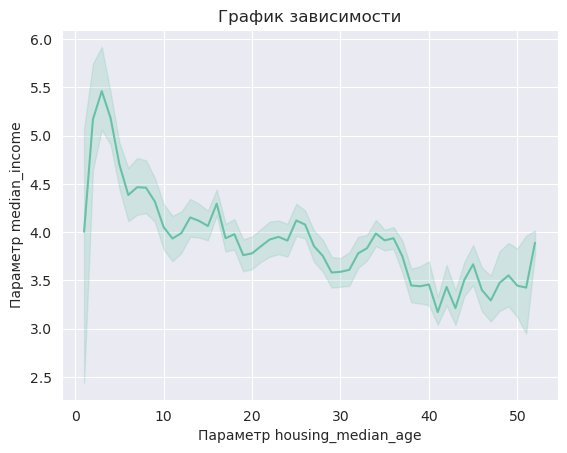

In [3]:
sns.set_style('darkgrid')
sns.set_palette('Set2')
sns.lineplot(
    x=data["housing_median_age"],
    y=data["median_income"],
)
plt.title('График зависимости')
plt.xlabel('Параметр housing_median_age')
plt.ylabel('Параметр median_income')
plt.show()

In [4]:
x = np.array(data["housing_median_age"]).reshape(-1, 1)
y = np.array(data["median_income"]).reshape(-1, 1)

In [5]:
def create_polynomial_features(X, degree):
    """
    Создание полиномиальных признаков до заданной степени
    """
    X = np.array(X).reshape(-1, 1)
    n_samples = X.shape[0]
    features = np.ones((n_samples, degree + 1))
    for i in range(1, degree + 1):
        features[:, i] = X[:, 0] ** i
    return features

def fit_linear_regression(X, y):
    """
    w = (X^T X)^(-1) X^T y
    """
    return np.linalg.inv(X.T @ X) @ X.T @ y

def predict(X, weights):
    """
    Получение предсказаний модели
    """
    return X @ weights


In [6]:
DEGREES = 2
X_poly = create_polynomial_features(x, DEGREES)
weights = fit_linear_regression(X_poly, y)
predictions = predict(X_poly, weights)
mean_squared_error = np.mean((predictions - y) ** 2)
print(f'Среднеквадратическая ошибка = {mean_squared_error}')

Среднеквадратическая ошибка = 3.544787372914107


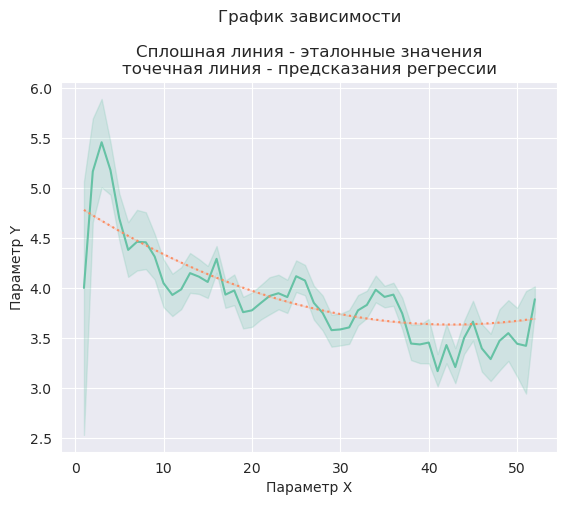

In [7]:
sns.lineplot(
    x=data["housing_median_age"],
    y=data["median_income"],
    linestyle="solid"
)
sns.lineplot(
    x=data["housing_median_age"],
    y=predictions.reshape(-1),
    linestyle="dotted"
)
plt.title(
    'График зависимости\n\n'
    'Сплошная линия - эталонные значения\n'
    'точечная линия - предсказания регрессии'
)
plt.xlabel('Параметр X')
plt.ylabel('Параметр Y')
plt.show()

In [8]:
print(weights)

[[ 4.83912802e+00]
 [-5.65020161e-02]
 [ 6.63934074e-04]]
